### NLP/NLU Model Which summerizes Medical Research Paper which makes them easier to read for Student
* In this Model We are Replicating Model proposed in paper [2017 PubMed 200k RCT](https://arxiv.org/abs/1710.06071)
* Dateset is freely available at [GITHUB](https://github.com/Franck-Dernoncourt/pubmed-rct)

In [1]:
def read_lines_from_txt(filename):
    """
    Reads a file named filename and returns lines of text as list
    Args:
      filename: string of target filepath
    Returns: list of string, one string per line as a list item
    """
    with open(filename, 'r') as f:
        return f.readlines()


def seprate_label_from_sentence(line,line_number):
    """
    seprate line with delimeter "\t


    """
    if (line[:3] != "###") and (line[:2] != "\n"):

        lst = line.split("\t")
        lst[1] = lst[1].replace("\n","")
        return {"target": lst[0],
                "text": lst[1].lower(),
                "line_number":line_number
                }

    else:
        pass


def extract_para(file_line_list):



    """
    will create dictionary object which contains all paragraph as indexed object
    eg. extract_para(train_txt_lines)[0] is a paragraph dict object extracted from txt file
    eg. extract_para(train_txt_lines)[0]["entire_para"][0] is a paragraph's {text,target} object

    return dict:
    {
    total_para:
    0:
    1:
    .
    .
    total_para
    }
    ----------
    index
    {
    entire_para: list of dic object containing target, text
    total_lines:total lines in para

    }


    :param file_line_list: txt file path
    :Note para is seprated by ###
    :return: dictionary conataining total_para, indexed para dic object
    """
    all_para = {"total_para": 0}
    i = 0
    line_number = 0
    para = {"entire_para": [],
            "total_lines": 0}

    for line in file_line_list:
        if line[:3] == '###':
            line_number = 0 # reset line number for new para
            all_para[i] = para
            all_para["total_para"] += 1
            para["total_lines"] = len(para["entire_para"]) - 1 # None line is present in list at the end
            para = {"entire_para": [],
                    "total_lines": 0}
            i += 1
            # print("para: \n")
            # print(para)
            # print(" all para: \n")
            # print(all_para)


        else:
            if line != None :

                txt_n_labels = seprate_label_from_sentence(line,line_number)
                # print(txt_n_labels) # will return label and text dict for line

                line_number += 1
                para["entire_para"].append(txt_n_labels)


    return all_para

# def extract_para(file_line_list):
#   all_para =  {}
#   i = 0
#   total = 0
#   para = {}

#   for line in file_line_list:
#     if line == r'###\d+\n':
#       all_para[i] = para
#       para = {}
#       i++
#     else:
#       tex_n_label = seprate_label_from_sentence(line = line,total_line = j)

#       para["target"]

def make_list_of_all_labeled_sentences(data_dic):

    """
    :param data_dic: data dictionary
    :return: list of all data which contains object
    """
    dev_deta_lines = []
    for index in range(len(data_dic) - 1):

        for line in range(data_dic[index]["total_lines"]):
          obj = data_dic[index]["entire_para"][line]
          obj["total_lines"] = data_dic[index]["total_lines"]
          dev_deta_lines.append(obj)

    return dev_deta_lines

from sklearn.metrics import accuracy_score, precision_recall_fscore_support


  # Calculate model accuracy

def accuracy_of_model(y_true,y_pred):
  """


  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  """
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results



In [2]:
import numpy as np

# from helpers import helper as hf   (en - local machine)
import pandas as pd





In [3]:
from tensorflow import constant

In [4]:

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct


# data_dir = "../data/pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign"  (en - local machine)


Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (33/33), 177.08 MiB | 44.13 MiB/s, done.
Resolving deltas: 100% (12/12), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [6]:
data_dir_20k = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"
data_dir_200k = "pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/"


In [7]:
import zipfile as zp
import os
# train.zip extraction
zipref   = zp.ZipFile("pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/train.zip",'r')
zipref.extractall()
zipref.close()

import shutil
shutil.move("train.txt", data_dir_200k)
os.remove(data_dir_200k+"train.zip")

In [8]:
# train_text_lines = hf.read_lines_from_txt(data_dir+"/train.txt")
# test_text_lines = hf.read_lines_from_txt(data_dir+"/test.txt")
# dev_text_lines = hf.read_lines_from_txt(data_dir+"/dev.txt")


train_text_lines_20k = read_lines_from_txt(data_dir_20k+"/train.txt")

test_text_lines_200k = read_lines_from_txt(data_dir_200k+"/test.txt")
dev_text_lines_200k = read_lines_from_txt(data_dir_200k+"/dev.txt")

train_text_lines_200k = read_lines_from_txt(data_dir_200k+"/train.txt")



In [9]:


# train_data_dic = hf.extract_para(train_text_lines)
# test_data_dic = hf.extract_para(test_text_lines)
# dev_data_dic = hf.extract_para(dev_text_lines)

train_data_dic_20k = extract_para(train_text_lines_20k)
test_data_dic_200k = extract_para(test_text_lines_200k)
dev_data_dic_200k = extract_para(dev_text_lines_200k)

train_data_dic_200k = extract_para(train_text_lines_200k)



* Data Modeling
```
# object return structure

    return dict:
    {
        "total_para":
        0:
        1:
        .
        .
        .
    }


    0 indexed deic structure
    {
        "entire_para": list of dic object containing target, text eg. [ { target:
                                                                          text:
                                                                         },
                                                                         {
                                                                                ..  
                                                                         }
                                                                       ]
        "total_lines":total lines in para

    }
```

In [10]:
print( "train: ", train_data_dic_200k["total_para"], "test:",
test_data_dic_200k["total_para"], "test:",
dev_data_dic_200k["total_para"]  )

train:  190654 test: 2500 test: 2500


In [12]:
# dev_data = pd.DataFrame(hf.make_list_of_all_labeled_sentences(dev_data_dic))
# test_data = pd.DataFrame(hf.make_list_of_all_labeled_sentences(test_data_dic))
# train_data = pd.DataFrame(hf.make_list_of_all_labeled_sentences(train_data_dic))

dev_data_200k = pd.DataFrame(make_list_of_all_labeled_sentences(dev_data_dic_200k))
test_data_200k = pd.DataFrame(make_list_of_all_labeled_sentences(test_data_dic_200k))
train_data_200k = pd.DataFrame(make_list_of_all_labeled_sentences(train_data_dic_200k))

train_data_20k = pd.DataFrame(make_list_of_all_labeled_sentences(train_data_dic_20k))






In [13]:
train_data_200k.head(20)

,target,text,line_number,total_lines
0,BACKGROUND,the emergence of hiv as a chronic condition me...,0,11
1,BACKGROUND,this paper describes the design and evaluation...,1,11
2,METHODS,this study is designed as a randomised control...,2,11
3,METHODS,the intervention group will participate in the...,3,11
4,METHODS,the program is based on self-efficacy theory a...,4,11
5,METHODS,participants will access the program for a min...,5,11
6,METHODS,primary outcomes are domain specific self-effi...,6,11
7,METHODS,"secondary outcomes include : depression , anxi...",7,11
8,METHODS,"data collection will take place at baseline , ...",8,11
9,CONCLUSIONS,results of the positive outlook study will pro...,9,11


In [ ]:
dev_data

In [ ]:
train_data.target.value_counts()

In [ ]:
import matplotlib.pyplot as plt
def sentences_count_in_para(data_dic = train_data_dic):
    count = []
    for index in range(len(data_dic) - 1):
        count.append(data_dic[index]["total_lines"])

    return count[1:]
sent_count_in_para = sentences_count_in_para(data_dic = train_data_dic)



In [ ]:
plt.hist(sent_count_in_para)

In [46]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(sparse=False)
train_labels_one_hot_200k = one_hot_enc.fit_transform(train_data_200k["target"].to_numpy().reshape(-1,1))
test_labels_one_hot_200k = one_hot_enc.fit_transform(test_data_200k["target"].to_numpy().reshape(-1,1))
val_labels_one_hot_200k = one_hot_enc.fit_transform(dev_data_200k["target"].to_numpy().reshape(-1,1))

# one Hot Encoding done in alphabetical order
# eg. ["BACKGROUND","CONCLUSION","METHODS","OBJECTS","RESULTS"]
# [0 , 0 , 1 , 0 , 0]

test_labels_200k = constant(test_labels_one_hot_200k)
train_labels_200k = constant(train_labels_one_hot_200k)
val_labels_200k = constant(val_labels_one_hot_200k)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

train_labels_encoded = label_enc.fit_transform(train_data_20k["target"].to_numpy())
# val_labels_encoded = label_enc.fit_transform(dev_data_200k["target"].to_numpy())
# test_labels_encoded = label_enc.fit_transform(test_data_200k["target"].to_numpy())



In [15]:
num_classes = len(label_enc.classes_)
class_names = label_enc.classes_

label_enc.inverse_transform([0,4]) # 0 = BACKGROUND
# can access class using label_enc.inverse_transform([0,4])

array(['BACKGROUND', 'RESULTS'], dtype=object)

15-09-23
> Note: DataModeling Almost done
* Abstract:
    * Labels:
        1. test_labels: one hot encoded tensors
        2. train_labels:  one hot encoded tensors shape = (180028, 5)
        3. val_labels:
    * Data:
        1. train_data: pd.DataFrame
        2. dev_data
        3. test_data


> note: so far we got 72% of accuracy we need more experimenting

 #### Deep Sequence Models

   * Goal is preparing Data in a proper form
   * and getting insights so that we can customize model for best result


##### Data insights
 * **avg sentence length in train data**

💡 most sentence length is leass than 50 mostly around 25

  * **Text Vectorization length we will take to 60 using above hist**

In [16]:
from tensorflow import keras
from tensorflow import data



##### MODEL

##### comparison base to model 1 on test data
   | Model                    | Accuracy |   Precision   | Recall | f1 |
    |--------------------------|----------|:-------------:|-------:|------:|
    | base                  | 71.6605 | 0.71245|  0.71660 | 0.692418 |
    | conv1D trained embedding |  79.430222 |   0.797181    |    0.79430 | 0.79256 |
    
> note : 80% accuracy on training dataset
commented as it is taking lot of time to fit


In [18]:
# universal sentence encoder downloaded from tensorflow hub
import tensorflow_hub as hub
# embedding_layer_tfhub = hub.KerasLayer("../data/use")


tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")






##### character level embedding


In [19]:
def split_sen_to_char(text):
    return " ".join(list(text))

split_sen_to_char("ok get it")

'o k   g e t   i t'

In [20]:
train_chars_200k = [split_sen_to_char(sent) for sent in train_data_200k["text"]]
val_chars_200k = [split_sen_to_char(sent) for sent in dev_data_200k["text"]]
test_chars_200k = [split_sen_to_char(sent) for sent in test_data_200k["text"]]

train_chars_20k = [split_sen_to_char(sent) for sent in train_data_20k["text"]]


In [21]:
len_char = [len(sentence) for sentence in train_chars_20k]
mean_len_char = np.mean(len_char)

In [22]:
print(f"Avg no of char in sentence: {mean_len_char} \n" )
OUTPUT_SEQ_LEN = round(mean_len_char)

Avg no of char in sentence: 297.7297309307441 



In [26]:
# from matplotlib.pyplot import plt
# plt.hist(len_char, bins = 20)

In [27]:
import string
len_all_chars = len(string.ascii_lowercase + string.digits + string.punctuation)


In [28]:
# token level embeding
vectorize_char_level_layer = keras.layers.TextVectorization(max_tokens=len_all_chars,
                                                            output_sequence_length=OUTPUT_SEQ_LEN,
                                                            name = "layer_char_level_vectorizeing"
                                                            )


In [29]:
vectorize_char_level_layer.adapt(train_chars_20k)
OUTPUT_DIM_CHAR_LEVEL = 25
embedding_char_level = keras.layers.Embedding(input_dim=OUTPUT_SEQ_LEN ,
                                              output_dim=25,
                                              mask_zero=True,
                                              name = "embedding_char_layer")

In [30]:
# train_char_dataset = data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(data.AUTOTUNE)
# val_char_dataset = data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(data.AUTOTUNE)


##### Multimodal Modal as described in paper

In [32]:
from tensorflow.keras.utils import plot_model

##### comparison base to model 1 on test data
    | Model                    | Accuracy |   Precision   | Recall | f1 |
    |--------------------------|----------|:-------------:|-------:|------:|
    | base                  | 71.6605 | 0.71245|  0.71660 | 0.692418 |
    | conv1D trained embedding |  79.430222 |   0.797181    |    0.79430 | 0.79256 |
    | model_token_and_char | 0.7386  |       |     |  |
    
> note : 80% accuracy on training dataset
commented as it is taking lot of time to fit

##### Adding positional feature embedding layer

#### feature engineering
> **NOTE:** one hot encode line number as a feature of our data as position embedding layer

> **NOTE:** from hist it is clear that line_number 15 is appearing in more than 10000 examples

In [36]:
import tensorflow as tf
train_line_number_one_hot_200k = tf.one_hot(train_data_200k["line_number"].to_numpy(),depth = 15)
val_line_number_one_hot_200k = tf.one_hot(dev_data_200k["line_number"].to_numpy(),depth = 15)

test_line_number_one_hot_200k = tf.one_hot(test_data_200k["line_number"].to_numpy(),depth = 15)


In [37]:

train_total_lines_one_hot_200k = tf.one_hot(train_data_200k["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot_200k = tf.one_hot(dev_data_200k["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot_200k = tf.one_hot(test_data_200k["total_lines"].to_numpy(), depth=20)

train_total_lines_one_hot_200k.shape, train_total_lines_one_hot_200k[:10]

(TensorShape([2211851, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 

In [41]:

# from tensorflow import
# model for token level feature
layer_input_token = keras.layers.Input(shape=[],
                                 dtype=tf.string,name="layer_input_token")
layer_embedding_token = tf_hub_embedding_layer(layer_input_token)
layer_output_token = keras.layers.Dense(128,activation="relu")(layer_embedding_token)
model_token = keras.Model(inputs = layer_input_token,
                          outputs = layer_output_token)


# model for char level feature




input_char = keras.layers.Input(shape=(1,),
                                 dtype=tf.string,
                                name="layer_input_char")
char_vecotorizer = vectorize_char_level_layer(input_char)

layer_embedding_char = embedding_char_level(char_vecotorizer)

layer_output_char_bidir = keras.layers.Bidirectional(keras.layers.LSTM(25))(layer_embedding_char)
model_char = keras.Model(inputs = input_char,
                          outputs = layer_output_char_bidir)


# concatenation combine 1 and 2

token_char_concat = keras.layers.Concatenate(name="token_char_hybrid_embedding")([model_token.output, model_char.output])

z = keras.layers.Dense(256,activation = "relu")(token_char_concat)
z = keras.layers.Dropout(0.5)(z)


# model for token line_number feature
line_number_inputs = keras.layers.Input(shape= (15,), dtype = tf.float32,name = "line_number_input")

x = keras.layers.Dense(32,activation = "relu" )(line_number_inputs)

line_number_model = keras.Model(inputs = line_number_inputs,
                                outputs = x)
# model for total_lines level feature

total_line_inputs = keras.layers.Input(shape= (20,), dtype = tf.float32, name = "toal_lines_input")

y = keras.layers.Dense(32,activation = "relu" )(total_line_inputs)

toal_lines_model = keras.Model(inputs = total_line_inputs,
                                outputs = y)

# combine outputs of z, line_number model, total_lines model

tribrid_embedding = keras.layers.Concatenate(name = "concatenation_of_char_token_positional_embedding")([line_number_model.output,toal_lines_model.output,z])

# layer that accepts aboube concatenated embedding

output_layer = keras.layers.Dense(5,activation = 'softmax',name = "final_output")(tribrid_embedding)

model_with_extra_feature = keras.Model(inputs = [line_number_model.input,toal_lines_model.input,model_token.input,model_char.input],
                                       outputs = output_layer)


# 5. Construct model with char and token inputs



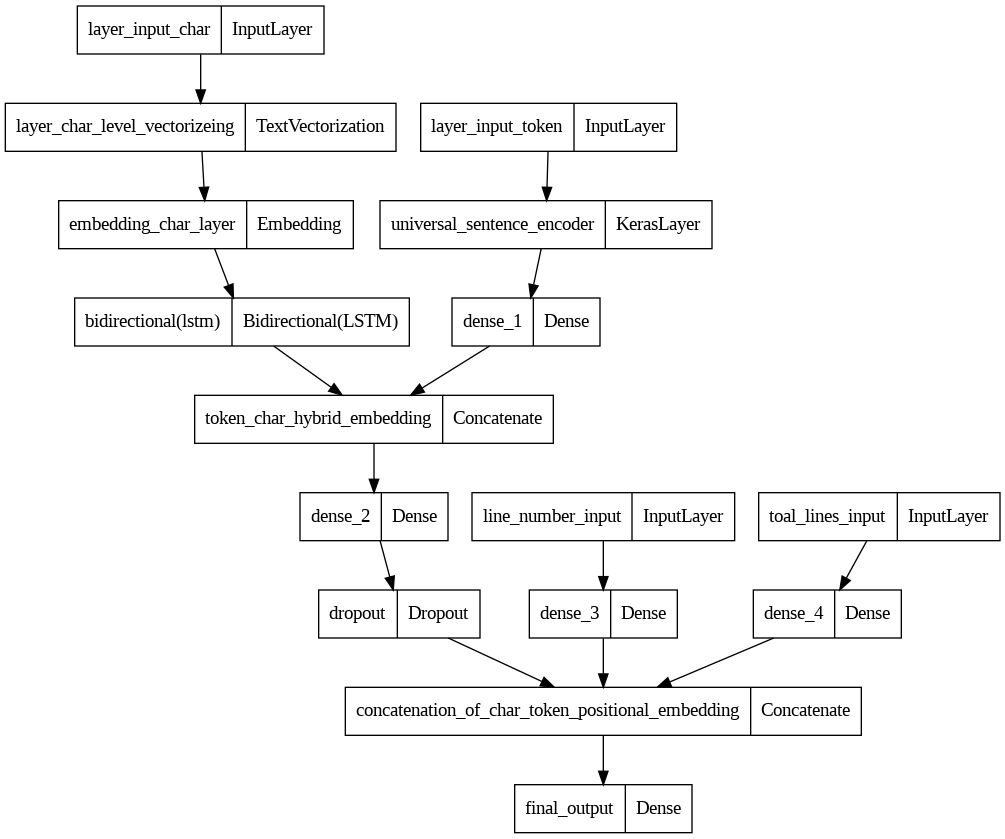

In [42]:
plot_model(model_with_extra_feature)

In [43]:


model_with_extra_feature.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [47]:

train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_number_one_hot_200k, # line numbers
                                                                train_total_lines_one_hot_200k, # total lines
                                                                train_data_200k["text"], # train tokens
                                                                train_chars_200k)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_200k) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_number_one_hot_200k,
                                                              val_total_lines_one_hot_200k,
                                                              dev_data_200k["text"],
                                                              val_chars_200k))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot_200k)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_pos_char_token_dataset

In [48]:

# Fit the token, char and positional embedding model
model_with_extra_feature_history = model_with_extra_feature.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
6912/6912 [==============================] - 347s 48ms/step - loss: 0.9397 - accuracy: 0.8300 - val_loss: 0.9075 - val_accuracy: 0.8521
Epoch 2/3
6912/6912 [==============================] - 309s 45ms/step - loss: 0.9067 - accuracy: 0.8526 - val_loss: 0.8951 - val_accuracy: 0.8656
Epoch 3/3
6912/6912 [==============================] - 308s 45ms/step - loss: 0.9024 - accuracy: 0.8555 - val_loss: 0.8887 - val_accuracy: 0.8646


In [49]:
random_med_para = 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.'

In [50]:
test_file = open("./test.txt",'r')
text = test_file.read()
random_med_para = text.replace("\n","")

FileNotFoundError: ignored

In [51]:
random_med_para

'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.'

##### On random data

In [52]:
# trained pipeline
 # create sentence splitting pipeline object

def para_to_formatted_inp(para = random_med_para):
  """
  function return list of dic obj containe text line number total lines
  """
  from spacy.lang.en import English
  nlp = English()
  sentencizer = nlp.add_pipe("sentencizer")
  doc = nlp(para)
  abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
  total_lines = len(abstract_lines)
  temp_list = []

  i = 0
  for line in abstract_lines:
    temp_dict = {}
    temp_dict["text"] = line
    temp_dict["line_number"] = i
    temp_dict["total_lines"] = total_lines
    i = i+1
    temp_list.append(temp_dict)



  return temp_list
lines = para_to_formatted_inp()
pd.DataFrame(lines)

,text,line_number,total_lines
0,This RCT examined the efficacy of a manualized...,0,8
1,Participants were randomly assigned to treatme...,1,8
2,Treatment included instruction and therapeutic...,2,8
3,A response-cost program was applied to reduce ...,3,8
4,Significant treatment effects were found for f...,4,8
5,Secondary measures based on staff ratings (tre...,5,8
6,"High levels of parent, child and staff satisfa...",6,8
7,Standardized effect size estimates were primar...,7,8


In [53]:
line_number_list = [line["line_number"] for line in lines]
total_line_list = [line["total_lines"] for line in lines]


In [54]:
import tensorflow as tf

In [55]:
one_hot_line_number = tf.one_hot(line_number_list,depth = 15)
one_hot_total_lines = tf.one_hot(total_line_list,depth = 20)
line_list = [line["text"] for line in lines]
splitted_lines_in_chars = [split_sen_to_char(line["text"]) for line in lines]


In [56]:
predected = model_with_extra_feature.predict(x = (one_hot_line_number,
                                       one_hot_total_lines,
                                       tf.constant(line_list),
                                       tf.constant(splitted_lines_in_chars)))

1/1 [==============================] - 3s 3s/step


In [57]:
predected = tf.argmax(predected,axis = 1)

In [58]:
test_abstract_pred_classes = [label_enc.classes_[i] for i in predected]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [59]:
for i, line in enumerate(line_list):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


In [75]:
from tensorflow.python.ops.math_ops import Range
def transform_para(predictions=test_abstract_pred_classes,lines_list = line_list):
  temp_dic = {
      "BACKGROUND":[],
      "OBJECTIVE":[],
      "METHODS":[],
      "RESULTS":[],
      "CONCLUSIONS":[],
  }
  i = 0
  for i in range(len(lines_list )- 1):
    pred_class = predictions[i]
    # print(pred_class)
    temp_dic[pred_class].append(lines_list[i])




  return temp_dic


transform_para()



{'BACKGROUND': [],
 'OBJECTIVE': ['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.'],
 'METHODS': ['Participants were randomly assigned to treatment or wait-list conditions.',
  'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.'],
 'RESULTS': ['Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.'],
 'CONCLUSIONS': []}

This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


to

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.

METHODS: Participants were randomly assigned to treatment or wait-list conditions.

METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.

METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.

RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).

METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.

RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.

RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
model_with_extra_feature.save("drive/MyDrive/90_percent_model_200k")


In [72]:
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']